## Import Some Libraries

In [86]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load And Explore Our DataSet

In [87]:
### Load Our CSV DataSet
DataSet = pd.read_csv("IRIS.csv")

In [88]:
### Display first 10
DataSet.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [89]:
### Display last 10
DataSet.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Data exploration

In [90]:
### Shape of DataSet 
DataSet.shape

(150, 5)

In [91]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [92]:
### Description of DataSet
DataSet.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [93]:
DataSet.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [95]:
DataSet.duplicated().sum()

3

In [96]:
DataSet.drop_duplicates(inplace=True)

In [97]:
DataSet.duplicated().sum()

0

## Data Visualization

In [98]:
### Total counts of each species item
species_counts = DataSet['species'].value_counts()
species_counts

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

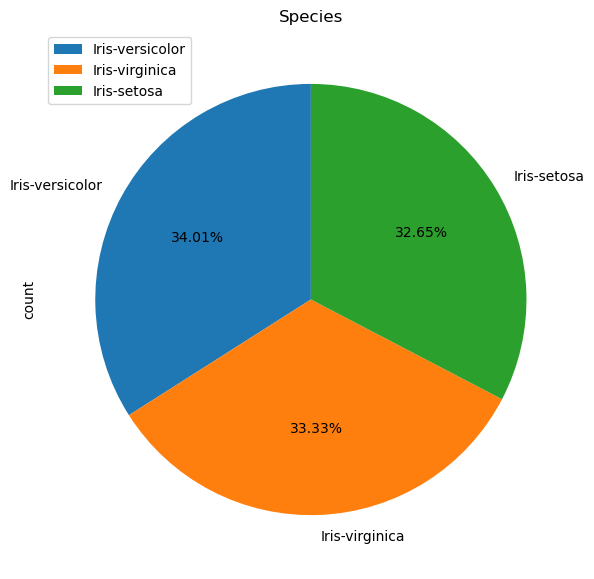

In [100]:
### pie chart 

plt.figure(figsize=(8,7))
species_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Species')
plt.legend(loc='upper left', labels=species_counts.index)
plt.show()

C:\ProgramData\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


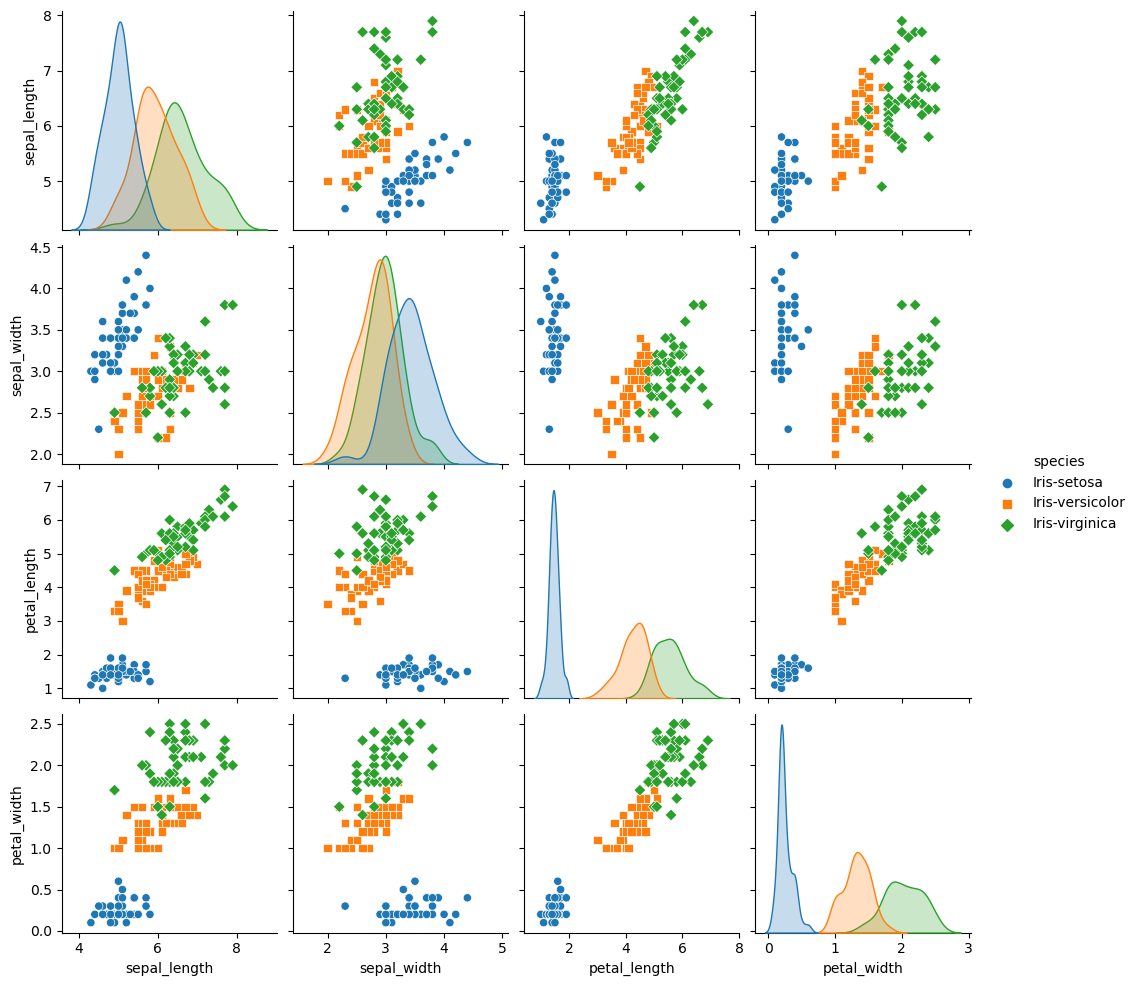

In [101]:
### Pairplot for visualization

sns.pairplot(DataSet, hue='species', markers=["o", "s", "D"])
plt.show()

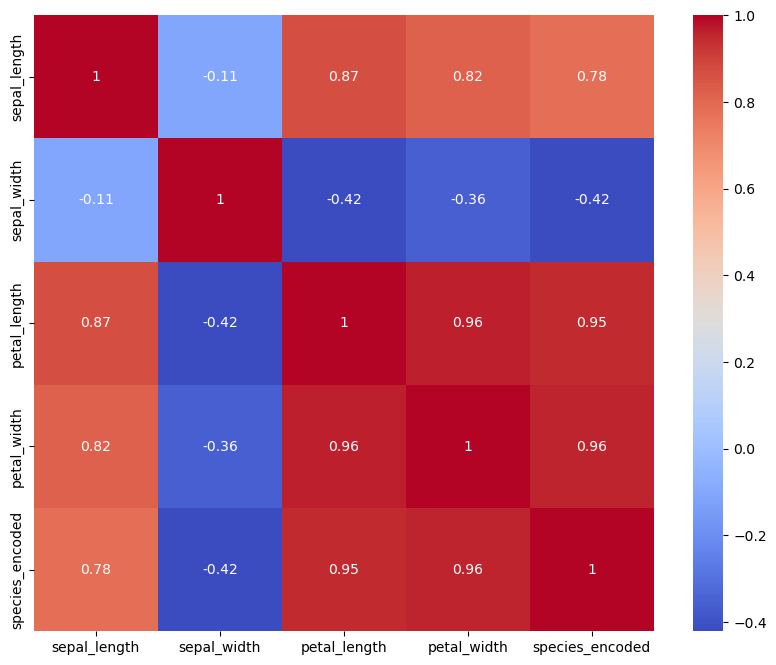

In [102]:
### Correlation heatmap

from sklearn.preprocessing import LabelEncoder

### Encode the 'species' column
label_encoder = LabelEncoder()
DataSet['species_encoded'] = label_encoder.fit_transform(DataSet['species'])

### Select only numeric columns for correlation calculation
numeric_data = DataSet.select_dtypes(include=[float, int])

### Calculate the correlation matrix
corr_matrix = numeric_data.corr()

### Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Preprocess the Data

In [103]:
### Separate features and target
X = DataSet.drop(columns='species')
y = DataSet['species']

In [104]:
### Split the data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [105]:
### Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the Model

In [106]:
 ### Initialize and train the KNN classifier
KNC = KNeighborsClassifier(n_neighbors=3)
KNC.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [107]:
### Make predictions
y_pred = KNC.predict(X_test)

## Evaluate the Model

In [108]:
### Evaluating the performance of the model using various metrics

In [109]:
### Calculate Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [110]:
### Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [111]:
### Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Visualization Of Model Performance

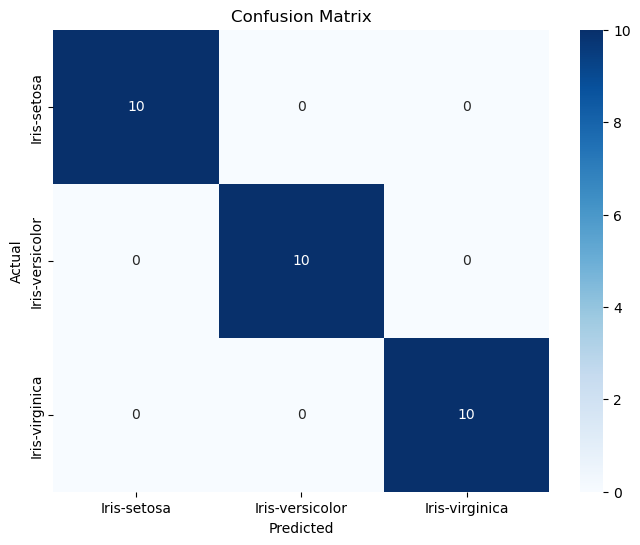

In [112]:
### Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Save the Model With Joblib

In [113]:
import joblib

### Saving the model using joblib to enable Persistence, Efficiency, Consistency and Scalability 
joblib.dump(KNC, 'KNC_model.pkl')

['KNC_model.pkl']